# 🍈🍌🍎

* apple width ≈ 6cm
- apple length ≈ 6cm
* banana width ≈ 4cm
- banana length ≈ 8cm
* melon width ≈ 10cm
- melon length ≈ 10cm

 apples : 0  banana : 1  watermelon : 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [3]:
def generate_dataset(n):
    apple_width = np.random.normal(6, 1, n)
    apple_length = np.random.normal(6, 1, n)
    banana_width = np.random.normal(4, 1, n)
    banana_length = np.random.normal(8, 1, n)
    melon_width = np.random.normal(10, 2, n)
    melon_length = np.random.normal(10, 2, n)

    width = np.concatenate((apple_width, banana_width, melon_width))
    length = np.concatenate((apple_length, banana_length, melon_length))
    X = np.array([width, length]).T

    Y_apples = np.zeros(n, dtype='int')
    Y_bananas = np.ones(n, dtype='int')
    Y_melons = np.ones(n, dtype='int')*2
    Y = np.concatenate((Y_apples, Y_bananas, Y_melons))

    return X, Y

In [4]:
X_train, Y_train = generate_dataset(200)

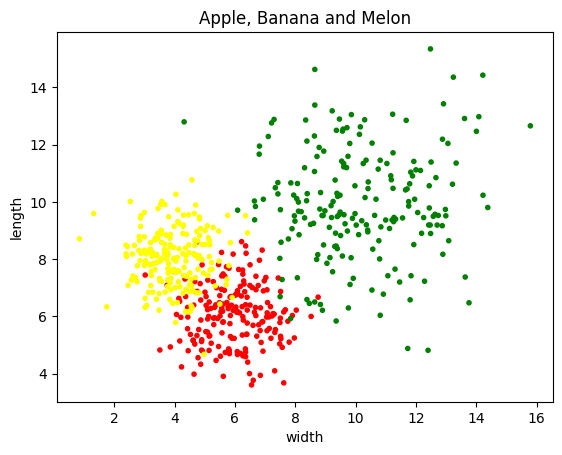

In [5]:
cmap = ['red', 'yellow', 'green']
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=colors.ListedColormap(cmap), marker='.')
plt.title('Apple, Banana and Melon')
plt.xlabel('width')
plt.ylabel('length')
plt.show()

## KNN : K Nearest Neighbors

In [6]:
from knn import KNN

In [7]:
knn = KNN(k=5)
knn.fit(X_train, Y_train)

In [8]:
new_fruits = [[4, 4], [3, 8], [9, 9]]
outputs = knn.predict(new_fruits)

In [9]:
for output in outputs:
    if output == 0:
        print('🍎')
    elif output == 1:
        print('🍌')
    else:
        print('🍈')

🍎
🍌
🍈


In [10]:
X_test, Y_test = generate_dataset(60)


In [11]:
knn.evaluate(X_test, Y_test)

91.66666666666666

In [12]:
Y_pred = knn.predict(X_test)

In [13]:
confusion_matrix = np.zeros((3, 3))
for i in range(180):
    # print(Y_test[i], Y_pred[i])
    if Y_test[i] == 0 and Y_pred[i] == 0:
        confusion_matrix[0][0] += 1
    elif Y_test[i] == 0 and Y_pred[i] == 1:
        confusion_matrix[0][1] += 1
    elif Y_test[i] == 0 and Y_pred[i] == 2:
        confusion_matrix[0][2] += 1
    elif Y_test[i] == 1 and Y_pred[i] == 1:
        confusion_matrix[1][1] += 1
    elif Y_test[i] == 1 and Y_pred[i] == 0:
        confusion_matrix[1][0] += 1
    elif Y_test[i] == 1 and Y_pred[i] == 2:
        confusion_matrix[1][2] += 1
    elif Y_test[i] == 2 and Y_pred[i] == 2:
        confusion_matrix[2][2] += 1
    elif Y_test[i] == 2 and Y_pred[i] == 0:
        confusion_matrix[2][0] += 1
    elif Y_test[i] == 2 and Y_pred[i] == 1:
        confusion_matrix[2][1] += 1

confusion_matrix

array([[54.,  5.,  1.],
       [ 6., 54.,  0.],
       [ 1.,  2., 57.]])

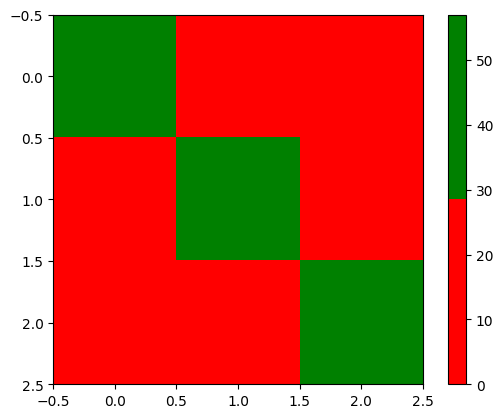

In [14]:
colormap = ['red', 'green']
plt.imshow(confusion_matrix, cmap=colors.ListedColormap(colormap))
plt.colorbar()
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
knn.predict(new_fruits)

array([0, 1, 2])

In [16]:
knn.score(X_test, Y_test)

0.9166666666666666